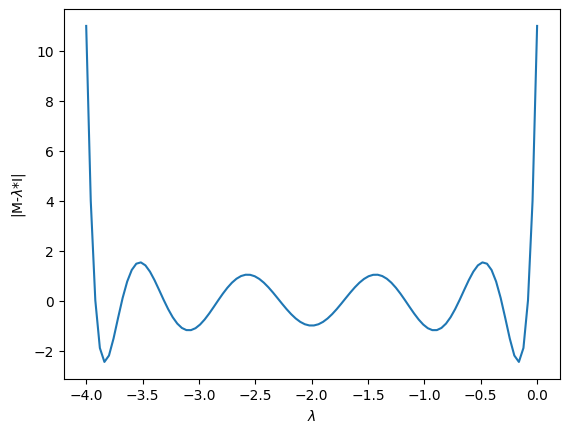

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# LU decomposition for tridiagonal matrix
def LU_td(A):
    diag_A=np.diag(A)
    diag_up_A=np.diag(A,1)
    diag_down_A=np.diag(A,-1)
    diag_down_L=np.ones(np.size(diag_down_A))
    diag_U=np.ones(np.size(diag_A))
    diag_up_U=diag_up_A
    diag_U[0]=diag_A[0]
    n=np.size(diag_A)
    for j in range(1,n):
        diag_down_L[j-1]=diag_down_A[j-1]/diag_U[j-1]
        diag_U[j]=diag_A[j]-diag_down_L[j-1]*diag_up_U[j-1]
    L=np.diag(diag_down_L,-1)+np.eye(n)
    U=np.diag(diag_up_U,1)+np.diag(diag_U)
    return L,U

# determinant of tridiagonal matrix by LU decomposition
def det_LU(M):
    [L,U]=LU_td(M)
    det=1
    diag_U=np.diag(U)
    n=np.size(M,0)
    for j in range(0,n):
        det=det*diag_U[j]
    return det

M=np.diag(-2*np.ones(10))+np.diag(np.ones(9),1)+np.diag(np.ones(9),-1)
I=np.eye(10)
Lambda = np.linspace(-4,0,100) 
N=np.size(Lambda)
det_Lambda=np.zeros(N)
for i,eig in enumerate(Lambda):
    det_Lambda[i]=det_LU(M-eig*I)
plt.plot(Lambda,det_Lambda) 
plt.xlabel('$\lambda$')
plt.ylabel('|M-$\lambda$*I|')
plt.show()